In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('c:\\Users\\BCimr\\OneDrive - University of Waterloo\\ECE\\3A\\Barrio-RQI\\MachineLearningQFT\\scripts\\experiment_params')
sys.path.append('c:\\Users\\BCimr\\OneDrive - University of Waterloo\\ECE\\3A\\Barrio-RQI\\MachineLearningQFT\\utils')


In [3]:
os.chdir('..')
os.chdir('Data')


exps = os.listdir()

for exp in exps:
    os.chdir(exp)
    times = os.listdir()
    for t in times:
        if 'output' not in t:
            os.chdir(t)
            for f in os.listdir():
                os.chdir(f)
                for d in os.listdir():
                    if 'exp' in d:
                        os.remove(d)
                os.chdir('..')
            os.chdir('..')
    os.chdir('..')
os.getcwd()


'c:\\Users\\BCimr\\OneDrive - University of Waterloo\\ECE\\3A\\Barrio-RQI\\MachineLearningQFT\\Data'

1.178912824847821e-11


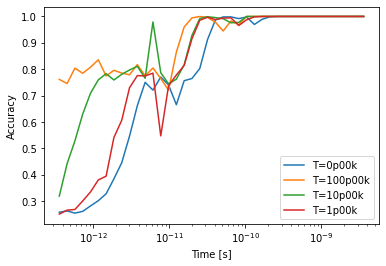

In [4]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'smearing_classification_all' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import smearing_classification_params as scp

print(scp.T0)

fig, ax = plt.subplots()

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1])

ax.set_xscale('log')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()

In [9]:
exps

['2D_geometry_classification',
 '2D_geometry_classification_ntom=1e4_T=0p0K_nH1=20_n_epochs=10_l2reg=1e-2p0_lr=1e-2p0',
 'circular_boundary_classification_ntom=1e4_T=0p0K_nH1=20_n_epochs=10_l2reg=1e-2p0_lr=1e-2p0',
 'circular_boundary_classification_run2_T=0_L=100_sig=18e_3',
 'position_regression_ntom=1e8_T=0p0K_nH1=32_n_epochs=20_l2reg=1e-4p0_lr=1e-3p0',
 'smearing_classification_all_lr=-2_n_epochs=10_T=0p00k',
 'smearing_classification_all_lr=-2_n_epochs=10_T=100p00k',
 'smearing_classification_all_lr=-2_n_epochs=10_T=10p00k',
 'smearing_classification_all_lr=-2_n_epochs=10_T=1p00k',
 'smearing_classification_ntom=1e7_T=0p0K_nH1=30_n_epochs=10_l2reg=1e-2p0_lr=1e-3p0',
 'smearing_classification_ntom=1e7_T=0p1K_nH1=30_n_epochs=10_l2reg=1e-2p0_lr=1e-3p0',
 'smearing_classification_ntom=1e7_T=1p0K_nH1=30_n_epochs=10_l2reg=1e-2p0_lr=1e-3p0']

1.178912824847821e-11


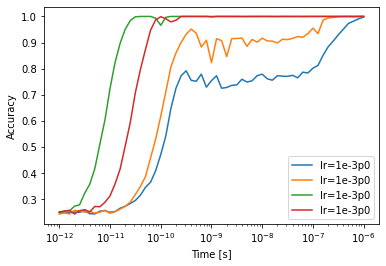

In [12]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'smearing_classification_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import smearing_classification_params as scp

print(scp.T0)

fig, ax = plt.subplots()

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1])

ax.set_xscale('log')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()

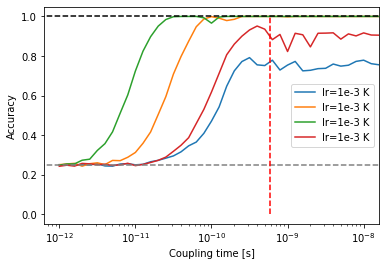

In [13]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'smearing_classification_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import smearing_classification_params as scp

#val_accs[3][13] = (val_accs[3][10] + val_accs[3][12])/2
#val_accs[2][12] = (val_accs[2][14] + val_accs[2][10])/2

fig, ax = plt.subplots()

for i in [0,3,2,1]:
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1].split('p')[0] + ' K')

ax.plot([0,1], [1,1], c='black', linestyle='--')
ax.plot([0,1], [0.25,0.25], c='grey', linestyle='--')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')

ax.set_xscale('log')
ax.set_xlim(10**(-12 - 4*0.05), 10**(-8 + 4*0.05))
ax.set_xlabel('Coupling time [s]')
ax.set_ylabel('Accuracy')
ax.legend(loc='right')
#fig.savefig('Figures/smearing_classification_curves_all_T.png')
#fig.savefig('Figures/smearing_classification_curves_all_T=0.pdf')

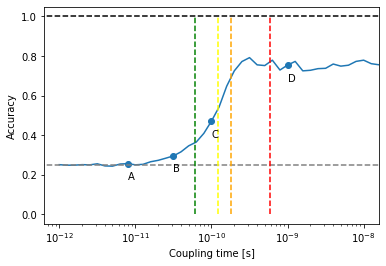

In [14]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'smearing_classification_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import smearing_classification_params as scp

val_accs[3][13] = (val_accs[3][10] + val_accs[3][12])/2
val_accs[2][12] = (val_accs[2][14] + val_accs[2][10])/2

fig, ax = plt.subplots()

for i in [0]:
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1].split('p')[0])

ax.plot([0,1], [1,1], c='black', linestyle='--')
ax.plot([0,1], [0.25,0.25], c='grey', linestyle='--')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')
ax.plot([scp.sigma*scp.T0]*2, [0,1], c='green', linestyle='--')
ax.plot([scp.sigma*2*scp.T0]*2, [0,1], c='yellow', linestyle='--')
ax.plot([scp.sigma*3*scp.T0]*2, [0,1], c='orange', linestyle='--')
select=[9,15,20,30]
ax.scatter([times[0][i]*scp.T0 for i in select], [val_accs[0][i] for i in select])

ax.set_xscale('log')
ax.set_xlim(10**(-12 - 4*0.05), 10**(-8 + 4*0.05))
ax.set_xlabel('Coupling time [s]')
ax.set_ylabel('Accuracy')

select_label = ['A','B','C','D']

for i, txt in enumerate(select_label):
    ax.annotate(txt, (times[0][select[i]]*scp.T0*(1), val_accs[0][select[i]]-0.08))


#fig.savefig('Figures/smearing_classification_curve_T=0.png')
#fig.savefig('Figures/smearing_classification_curve_T=0.pdf')

In [15]:
def normalize_confusion_matrix(A):
    return A/np.tile(np.reshape(np.sum(A, axis=1), (-1, 1)), A.shape[0])

C:\Users\BCimr\AppData\Local\Temp\ipykernel_14044\3515633810.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'], rotation=60)
C:\Users\BCimr\AppData\Local\Temp\ipykernel_14044\3515633810.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'])


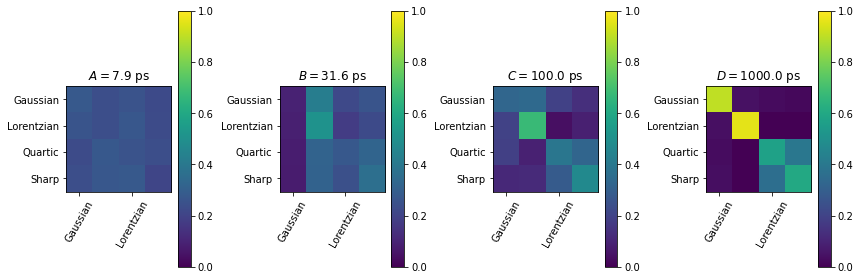

In [16]:
fig, ax = plt.subplots(1,4,figsize=(12,4))
labels = [str(np.around(times[0][i]*scp.T0*1e12, 1)) for i in select]
for i, j in enumerate([9, 15, 20, 30]):
    im = ax[i].imshow(normalize_confusion_matrix(confusions[0][j]), vmin=0, vmax=1)
    ax[i].set_xticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'], rotation=60)
    ax[i].set_yticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'])
    ax[i].set_title(r'$' + select_label[i] + '='+labels[i] + '$ ps')
    fig.colorbar(im)

fig.tight_layout()
#fig.savefig('Figures/smearing_classification_confusions_T=0.png')
#fig.savefig('Figures/smearing_classification_confusions_T=0.pdf')

In [ ]:
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']


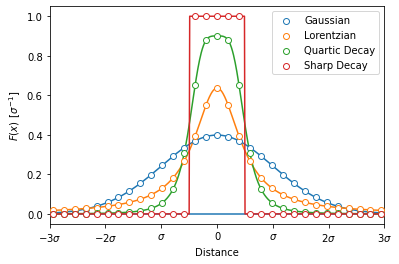

In [ ]:
import smearing_functions as sf

xfine = np.linspace(-50, 50, 2001)
xcourse = np.linspace(-50, 50, 101)
ygc = sf.gaussian_smearing(xcourse, scp.sigma)*scp.sigma
ylc = sf.lorentzian_smearing(xcourse, scp.sigma)*scp.sigma
yqc = sf.quartic_smearing(xcourse, scp.sigma)*scp.sigma
ysc = [sf.sharp_smearing(xcourse[i], scp.sigma)*scp.sigma for i in range(len(xcourse))]

ygf = sf.gaussian_smearing(xfine, scp.sigma)*scp.sigma
ylf = sf.lorentzian_smearing(xfine, scp.sigma)*scp.sigma
yqf = sf.quartic_smearing(xfine, scp.sigma)*scp.sigma
ysf = [sf.sharp_smearing(xfine[i], scp.sigma)*scp.sigma for i in range(len(xfine))]

yc = [ygc, ylc, yqc, ysc]
yf = [ygf, ylf, yqf, ysf]

fig, ax = plt.subplots()

ax.plot([-50, 50], [0,0])

smearing_labels=['Gaussian', 'Lorentzian', 'Quartic Decay', 'Sharp Decay']
for i in range(len(yc)):
    ax.plot(xfine, yf[i], c=colours[i])
    ax.scatter(xcourse, yc[i], marker='o', edgecolor=colours[i], facecolor='white', zorder=50, label=smearing_labels[i])

ax.set_xlim(-3*scp.sigma, 3*scp.sigma)
ax.set_xticks([i*scp.sigma for i in range(-3,4)])

labels = [r'$' + str(i) + '\sigma$' for i in [-3,-2,2,3]]
labels.insert(2, r'$\sigma$')
labels.insert(3, '0')
labels.insert(4, r'$\sigma$')

ax.set_xticklabels(labels)
ax.set_xlabel('Distance')
ax.set_ylabel(r'$F(x)\:\: [\sigma^{-1}]$')
ax.legend()
#fig.savefig('Figures\smearing_functions.png')
#fig.savefig('Figures\smearing_functions.pdf')

5.09295817894065 0.001178912824847821 0.11789128248478209 0.11789128248478209 0.0 0.0035342917352885173 1.178912824847821e-11 1.178912824847821e-09
[ 0.08482391  0.10081341  0.11981696  0.14240273  0.16924596  0.2011492
  0.23906627  0.2841308   0.33769008  0.40134542  0.47699992  0.56691547
  0.6737803   0.80078939  0.95173997  1.13114507  1.34436844  1.59778488
  1.89897089  2.25693113  2.68236768  3.18799996  3.78894506  4.50316964
  5.35202715  6.36089619  7.55993929  8.98500468 10.67869808 12.69165645
 15.08406196 17.92744124 21.30680385 25.32318384 30.09666039 35.76994792
 42.51266277 50.5263944  60.05073229 71.37042909 84.82391394]
1.178912824847821e-11


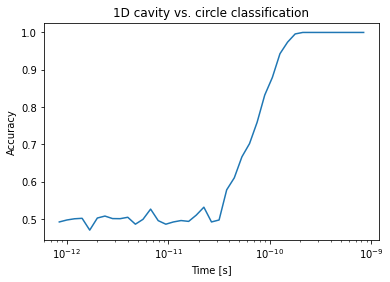

In [11]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []

for exp in exps:
    if 'circular_boundary_classification_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()[:, 1:]
        times.append(arr[0])
        val_accs.append(arr[2])
        conf = []
        for i in range(arr[3:].shape[1]):
            conf.append(arr[3:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()
#ax.plot([0,30], [1,1], c='black', linestyle='--')
#ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
#ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

val_accs[0][37:] = np.ones((4,))

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0, val_accs[i], label=labels[i].split('_')[-3])


#ax.set_xlim(-30*0.05, 30*1.05)
ax.set_title('1D cavity vs. circle classification')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')
#fig.savefig('Figures\oneD_cavity_vs_circle.png')
#fig.savefig('Figures\oneD_cavity_vs_circle.pdf')


In [34]:
val_accs[0][[20, 21]]

array([0.79374999, 0.87625003])

1.178912824847821e-11


Text(0, 0.5, 'Accuracy')

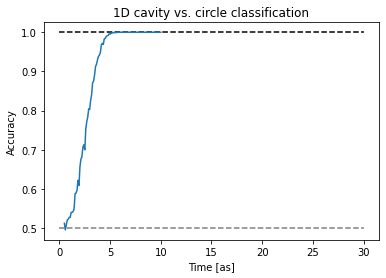

In [77]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'circular_boundary_classification_run2' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[0, 1:])
        val_accs.append(arr[1, 1:])
        conf = []
        for i in range(1, arr[2:, :].shape[1]):
            conf.append(arr[2:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()
ax.plot([0,30], [1,1], c='black', linestyle='--')
ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0*1e15, val_accs[i], label=labels[i].split('_')[-3])


ax.set_xlim(-30*0.05, 30*1.05)
ax.set_title('1D cavity vs. circle classification')
ax.set_xlabel('Time [as]')
ax.set_ylabel('Accuracy')
#fig.savefig('Figures\oneD_cavity_vs_circle.png')
#fig.savefig('Figures\oneD_cavity_vs_circle.pdf')


1.178912824847821e-11


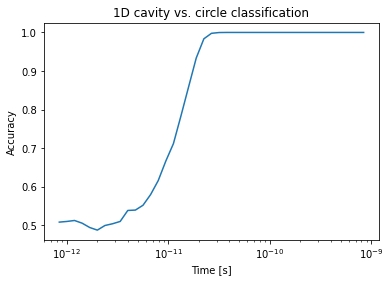

In [80]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if '2D_geometry_classification_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()[:, 1:]
        times.append(arr[0])
        val_accs.append(arr[2])
        conf = []
        for i in range(arr[3:].shape[1]):
            conf.append(arr[3:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()
#ax.plot([0,30], [1,1], c='black', linestyle='--')
#ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
#ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0, val_accs[i], label=labels[i].split('_')[-3])


#ax.set_xlim(-30*0.05, 30*1.05)
ax.set_title('1D cavity vs. circle classification')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.set_xscale('log')
#fig.savefig('Figures\oneD_cavity_vs_circle.png')
#fig.savefig('Figures\oneD_cavity_vs_circle.pdf')


(5, 51)
1.178912824847821e-11


Text(0, 0.5, 'Accuracy')

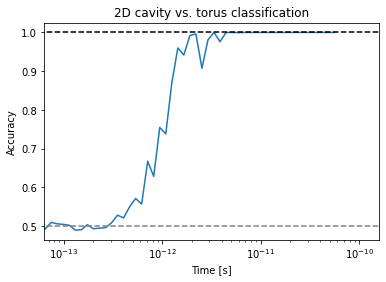

In [83]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if '2D_geometry_classification_final' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0, val_accs[i], label=labels[i].split('_')[-3])

ax.set_xscale('log')

ax.plot([0,30], [1,1], c='black', linestyle='--')
ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

ax.set_xlim(10**(-13-4*0.05), 10**(-10+4*0.05))
ax.set_title('2D cavity vs. torus classification')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
#fig.savefig('Figures/twoD_rectangular_cavity_vs_torus.png')
#fig.savefig('Figures/twoD_rectangular_cavity_vs_torus.pdf')


(7, 52)
1.178912824847821e-11


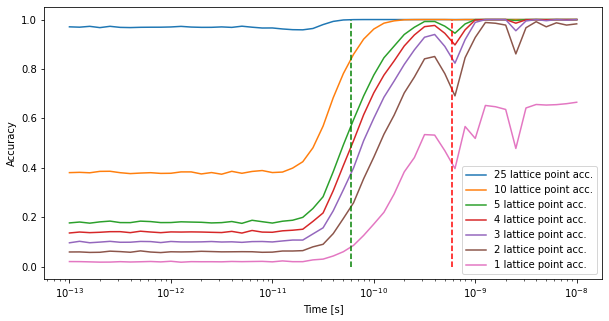

In [43]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'position_regression_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs = arr[2:, 1:]
        labels.append(exp)
        idxs.append(exp)

import detector_position_regression_params as dprp


print(dprp.T0)

fig, ax = plt.subplots(figsize=(10, 5))
deltas = [0.25, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01]

for i in range(val_accs.shape[0]):
    ax.plot(np.asarray(times[0])*dprp.T0, val_accs[i], label=str(int(deltas[i]*100)) + ' lattice point acc.')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')
ax.plot([scp.sigma*scp.T0]*2, [0,1], c='green', linestyle='--')

ax.set_xscale('log')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()

In [ ]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
exps = os.listdir()

for exp in exps:
    if 'position_regression_ntom' in exp:
        arr = pd.read_csv(os.getcwd() + '\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs = arr[2:, 1:]
        labels.append(exp)
        idxs.append(exp)

import detector_position_regression_params as dprp


print(dprp.T0)

fig, ax = plt.subplots(figsize=(10, 5))
deltas = [0.25, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01]

for i in range(val_accs.shape[0]):
    ax.plot(np.asarray(times[0])*dprp.T0, val_accs[i], label=str(int(deltas[i]*100)) + ' lattice point acc.')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')
ax.plot([scp.sigma*scp.T0]*2, [0,1], c='green', linestyle='--')

ax.set_xscale('log')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()